# Online Commerce Data

In [1]:
import math

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
oln=pd.read_excel('/content/drive/MyDrive/dataset/LAB_dataset/Online Retail.xlsx')

In [9]:
oln.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<컬럼 설명>

InvoiceNo: 주문번호


StockCode: 상품코드


Description: 상품 설명


Quantity: 수량


InvoceDate: 주문날짜


UnitPrice: 개별 가격


CustomerID: 고객번호


Country: 국가

In [11]:
oln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
oln.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [17]:
print(("결측치 비율 : {:.2f} %".format((oln.isnull().sum().sum()*100)/(oln.shape[0]*oln.shape[1]))))

print('총데이터 : {}'.format(oln.shape[0]*oln.shape[1]))

결측치 비율 : 3.15 %
총데이터 : 4335272


##2.질문하기


* 어떤 고객이 가장 지출을 많이 했을까?
* 상품 금액의 분포는?
* 어떤 물건의 주문량이 높을까?
* 날짜에 따라 판매 금액을 확인해보자
* 요일에 따라서 주문량이 다를까?
* 국가 별 평균 구매 금액은?
* 이 쇼핑몰 판매 물품의 주요 키워드는?

##3.데이터 정비하기

###3-1. 컬럼명 바꾸기

In [4]:
# 소문자로 다운시키기.
oln.columns=oln.columns.str.lower()

oln.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [19]:
oln.isnull().sum(axis=0)

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
country             0
dtype: int64

In [5]:
oln[oln.isnull().any(axis=1)].head(4)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom


In [6]:
oln1 = oln.dropna()

oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


##3-2 컬럼타입변경하기

In [7]:
oln1['customerid']=oln1['customerid'].astype('int64')

oln1.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [24]:
oln1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  int64         
 7   country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


##3-3 새로운 데이터 컬럼 만들기

In [8]:
print(min(oln1['quantity']), max(oln1['quantity']))

print(min(oln1['unitprice']), max(oln1['unitprice']))

-80995 80995
0.0 38970.0


In [9]:
oln1= oln1[oln1['quantity']>0]

In [10]:
oln1['spent'] = oln1['quantity'] * oln1['unitprice']

In [30]:
oln1.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [11]:
oln1['year'] = oln1['invoicedate'].dt.year
oln1['month'] = oln1['invoicedate'].dt.month

oln1['day'] = oln1['invoicedate'].dt.day

oln1['weekday'] = oln1['invoicedate'].dt.weekday

oln1['hour']= oln1['invoicedate'].dt.hour

oln1.head(3)


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8


## 4-1 EDA

In [33]:
oln1.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8


In [35]:
oln1.description.value_counts().tail(10)

BLUE FELT HANGING HEART WITH FLOWER    1
GLASS CAKE COVER AND PLATE             1
CRACKED GLAZE EARRINGS RED             1
SCALLOP SHELL SOAP DISH                1
NECKLACE+BRACELET SET PINK DAISY       1
RUBY GLASS CLUSTER EARRINGS            1
PINK CHRYSANTHEMUMS ART FLOWER         1
72 CAKE CASES VINTAGE CHRISTMAS        1
WALL ART , THE MAGIC FOREST            1
PAPER CRAFT , LITTLE BIRDIE            1
Name: description, dtype: int64

In [36]:
oln1.description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: description, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

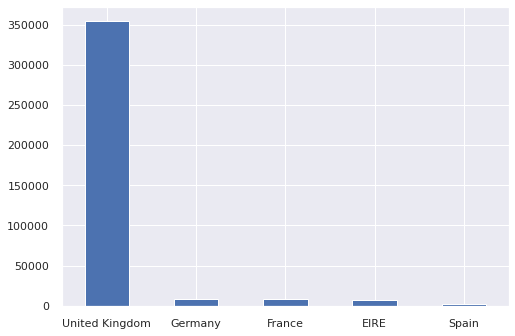

In [25]:
# 주문량이 많은 상위 5개 국가 bar plot으로 나타내기.

oln1.country.value_counts().head(5).plot.bar()

plt.xticks(rotation=0)

In [13]:
# 가장돈을 많이쓴 고객과 가장 적게쓴 고객은?

# 고객id에 대해 사용금액(spent)컬럼을 더해서 집계하기

res1=oln1[['customerid','spent']].groupby(['customerid']).sum()
print(res1)
res1.sort_values('spent',ascending=False)

res1 = res1[res1['spent']>0]


print('고객번호 {}, : {:.2f}'.format(int(res1['spent'].argmax()),res1.spent.max()))
print('고객번호 {}, : {:.2f}'.format(int(res1['spent'].argmin()),res1.spent.min()))

               spent
customerid          
12346       77183.60
12347        4310.00
12348        1797.24
12349        1757.55
12350         334.40
...              ...
18280         180.60
18281          80.82
18282         178.05
18283        2094.88
18287        1837.28

[4339 rows x 1 columns]
고객번호 1689, : 280206.02
고객번호 3217, : 3.75


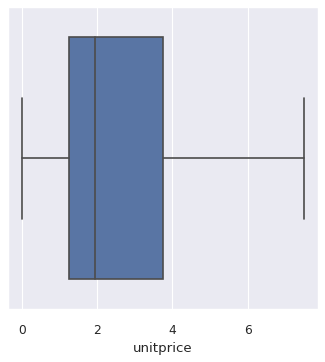

In [14]:
# 상품 금액대의 분포를 box plot으로 그리기.

f , ax = plt.subplots(1,1,figsize=(5,5),dpi=80)

sns.boxplot(oln1['unitprice'],showfliers=False,ax=ax)


In [47]:
# 주문량이 많은 상품 금액대를 파악 1

# 7 파운드 이하 상품들의 비율

oln1[oln1['unitprice']<=7].shape[0] / oln1.shape[0] * 100

91.05155758386023

In [48]:
# 주문량이 많은 상품 금액대 파악 2

np.sum(oln1[oln1['unitprice']<=8].spent)/np.sum(oln1.spent) * 100

88.08608447242726

## 4-2 날짜에 따른 판매금액 ( 시계열)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_

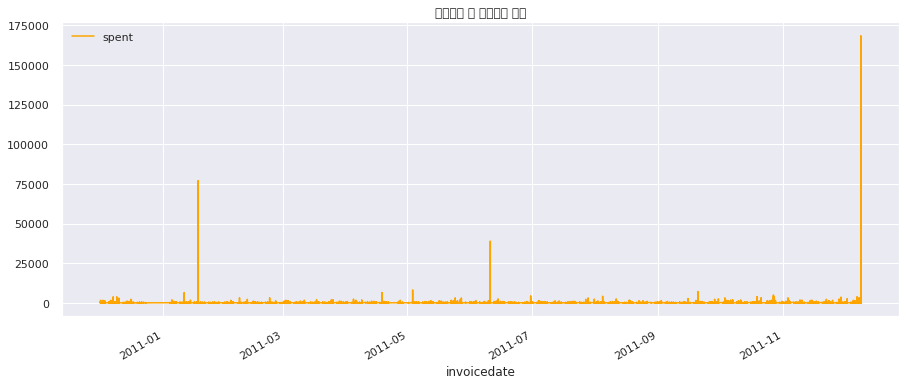

In [15]:
oln1.plot(x='invoicedate',y='spent',color='orange',figsize=(15,6))

plt.title('주문날짜 별 판매금액 추이');

## 4-3 요일별/시간별 주문량

In [54]:
oln1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,2,8


In [16]:
res2=oln1.drop_duplicates(['invoiceno'],keep='first')

res2.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,spent,year,month,day,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,2,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010,12,1,2,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010,12,1,2,8


[Text(0, 0, 'mon'),
 Text(0, 0, 'tues'),
 Text(0, 0, 'wed'),
 Text(0, 0, 'thu'),
 Text(0, 0, 'fri'),
 Text(0, 0, 'sun')]

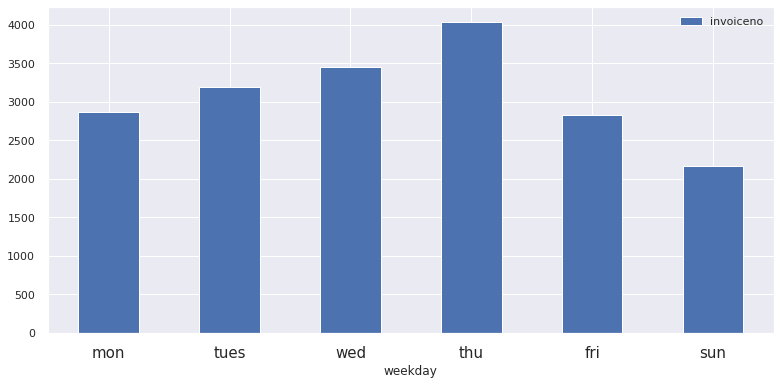

In [17]:
g1 = res2[['weekday','invoiceno']].groupby('weekday').count().plot(kind='bar',figsize=(13,6))

g1.set_xticklabels(['mon','tues','wed','thu','fri','sun'],rotation='horizontal',fontsize=15)

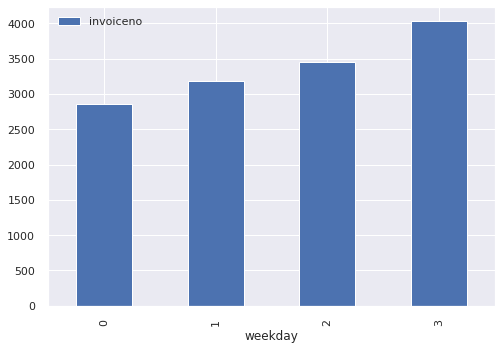

In [22]:
res2[['weekday','invoiceno']].groupby('weekday').count().head(4).plot(kind='bar')

In [23]:
res3 = res2[['hour','invoiceno']].groupby('hour').count()

In [63]:
res3

,invoiceno
hour,
6,1
7,29
8,555
9,1394
10,2226
11,2277
12,3129
13,2637
14,2275


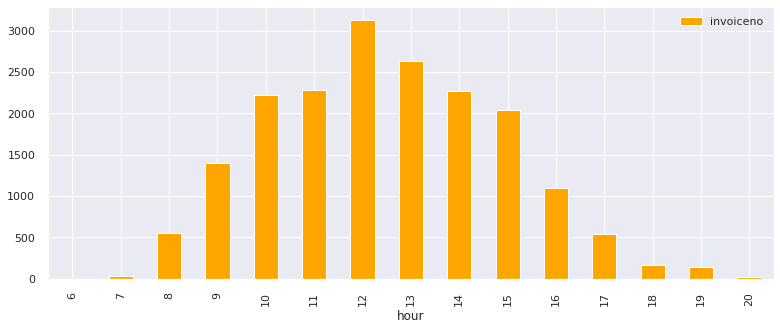

In [66]:
g2 = res3.plot(kind='bar',color='orange',figsize=(13,5))

plt.title('시간별 주문횟수')

###4-4. 국가별 1회 주문의 평균 구매금액

In [26]:
# 국가별 주문 당 평균 구매금액
# 국가별 주문 건수를 센 다음, (전체쓴돈/ 주문건수)
# 필요한 컬럼만 가져오기.

res4 = oln1[['quantity','spent','country','invoiceno']]

In [27]:
res4.head(4)

,quantity,spent,country,invoiceno
0,6,15.30,United Kingdom,536365
1,6,20.34,United Kingdom,536365
2,8,22.00,United Kingdom,536365
3,6,20.34,United Kingdom,536365


In [28]:
aa=res4.groupby(['country','invoiceno']).sum()

aa['count']=1

In [29]:
aa.head(4)

quantity    spent  count
country   invoiceno                          
Australia 536389          107   358.25      1
          537676          214   258.90      1
          539419          146   415.70      1
          540267         4662  7011.38      1

In [32]:
bb=aa.groupby(['country']).sum()

bb.head(5)

,quantity,spent,count
country,,,
Australia,84209,138521.31,57
Austria,4881,10198.68,17
Bahrain,260,548.40,2
Belgium,23237,41196.34,98
Brazil,356,1143.60,1


In [33]:
# bb의 spent/count 하면 국가별 주문건당 평균 매출액을 집계할 수 있다.

bb['avg_spent'] = bb['spent']/bb['count']

bb.sort_values(['count','avg_spent'],ascending=False,inplace=True)

bb.head()

,quantity,spent,count,avg_spent
country,,,,
United Kingdom,4269472,7308391.554,16649,438.968800
Germany,119263,228867.140,457,500.803370
France,111472,209024.050,389,537.336889
EIRE,140525,265545.900,260,1021.330385
Belgium,23237,41196.340,98,420.370816


Text(0.5, 0, '금액')

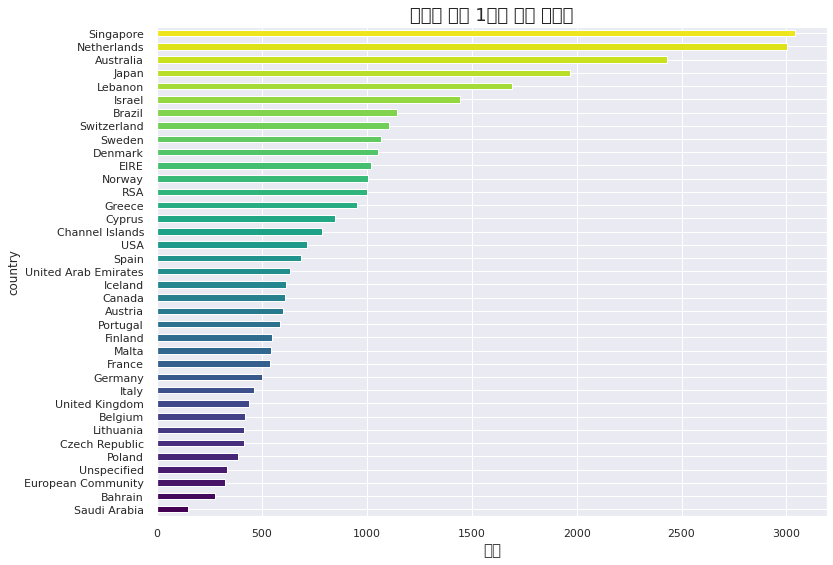

In [36]:
color = plt.cm.viridis(np.linspace(0,1,38))

bb['avg_spent'].sort_values().plot(kind='barh',figsize=(12,9),color=color)  #국가별 range()

plt.title('국가별 주문 1건당 평균 매출액',size=18)

plt.xlabel('금액',size=15)


###4-5 상품명에서 가장 빈번하게 등장하는 단어

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS


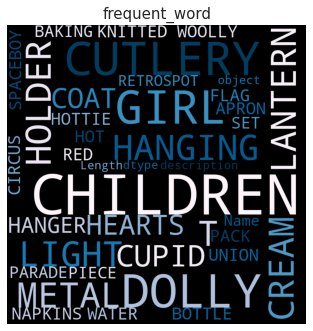

In [47]:
#Word Cloud를 손쉽게 그릴 수 있다.

stopwords = set(STOPWORDS)
stopwords.add('white')
stopwords.add('heart')

wordcloud = WordCloud(stopwords=stopwords,background_color='black',width=800,height=800,colormap='PuBu').generate(str(oln1['description']))

plt.axis('off')
plt.title('frequent_word',size=15)

plt.imshow(wordcloud)



* Online Retail 데이터는:  
총 데이터 수:  4335272  
총 결측치 수: 136534 = 전체 데이터의 3.15%   
전체 국가 수:  38  
전체 판매 물건 수:  4223  

* 어떤 고객이 가장 지출을 많이 했을까?  
  : 고객번호 1689 이 가장 소비를 많이 했다  
  : 고객번호 3217 이 가장 소비를 적게 했다

* 상품 금액의 분포는?  
  : 대체로 2 파운드 근처에서 상품 가격대가 형성되어 있다  
  : 8 파운드 이하 상품 주문이 93.28 % 를 차지한다  
  : 수익의 88.09 % 는 8 파운드 이하의 상품에서 발생한다  
* 어떤 물건의 주문량이 높을까?  
  : WHITE HANGING HEART T-LIGHT HOLDER  
* 주문 날짜 별 판매량은?
* 요일/시간에 따라서 주문량이 다를까?  
  : 목요일 주문이 가장 많고 일요일이 주문이 가장 적다  
  : 낮 12시에 주문이 가장 많다
* 국가별 고객 1인당 평균 구매 금액은?  
  : 영국의 매출액이 가장 높지만, 1인당 구매금액은 싱가포르가 가장 높다
* 이 쇼핑몰 판매 물품의 주요 키워드는?  
  : white, heart, children